# Decision Tree Specialty Coffee Case Study

 RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges.
 
 RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the Hidden Farm) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 
 
 As a Data scientist use machine learning to systematically make decisions about which coffee farmers they should strike deals with.It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. 
 
 Build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers. 
 
 To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':age, salary, gender, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA.

**1. Import required packages**

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree,metrics
from sklearn.model_selection import train_test_split
from IPython.display import Image  
import pydotplus

**2. Load coffee data file**

In [2]:
df= pd.read_csv("RRDinerCoffeeData.csv")

In [3]:
df.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


In [4]:
df

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0
...,...,...,...,...,...,...,...,...,...
697,45,Female,5,61,201,80260,10.476341,0,1.0
698,54,Male,5,44,116,44077,10.693889,1,0.0
699,63,Male,5,33,117,43081,10.755194,1,0.0
700,20,Female,5,41,159,12522,10.871566,0,NaN


**3. Cleaning the data, making sure some of the columns like Gender, Decision contains unique value. Also, change the name of spent_week, spent_month, and SlrAY to spent_last_week and spent_last_month and salary respectively.**

In [5]:
df.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [6]:
df = df.rename(columns={"spent_month":"spent_last_month", "spent_week":"spent_last_week", "SlrAY":"Salary"})

In [7]:
df

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0
...,...,...,...,...,...,...,...,...,...
697,45,Female,5,61,201,80260,10.476341,0,1.0
698,54,Male,5,44,116,44077,10.693889,1,0.0
699,63,Male,5,33,117,43081,10.755194,1,0.0
700,20,Female,5,41,159,12522,10.871566,0,NaN


In [8]:
df.Gender.describe()

count      702
unique       9
top       Male
freq       355
Name: Gender, dtype: object

In [9]:
df.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [10]:
df.Gender = df.Gender.replace(["female", "f ", "FEMALE", "F"], "Female")
df.Gender = df.Gender.replace(["MALE", "male","M"], "Male")

In [11]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.Decision.unique()

array([ 1., nan,  0.])

**4. Dropping "Na" values from Decision column and putting such rows data into No_prediction (No Prediction is needed)**

In [13]:
No_prediction = df.dropna(subset='Decision')

In [14]:
No_prediction

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
2,24,Male,0,39,119,30563,0.916005,1,1.0
4,24,Female,0,20,36,14244,0.965881,0,1.0
5,20,Female,0,23,28,14293,1.036346,1,1.0
6,34,Female,0,55,202,91035,1.134851,0,1.0
...,...,...,...,...,...,...,...,...,...
696,29,Female,5,20,74,29799,10.455068,0,0.0
697,45,Female,5,61,201,80260,10.476341,0,1.0
698,54,Male,5,44,116,44077,10.693889,1,0.0
699,63,Male,5,33,117,43081,10.755194,1,0.0


In [15]:
No_prediction.Decision.unique()

array([1., 0.])

**5. Plotting "Spent last month", "Distance" and "Decision" in a Scatter plot**

<AxesSubplot:xlabel='Distance', ylabel='spent_last_month'>

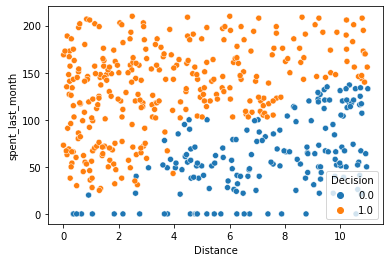

In [16]:
sns.scatterplot(y="spent_last_month", x= "Distance",hue = 'Decision',data=No_prediction)

**6. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction"**

In [84]:
Prediction=df[df['Decision'].isnull()]

In [85]:
Prediction

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,0,52,55227,5.984716,0,NaN
677,67,Male,5,41,151,182058,6.288700,1,NaN
680,24,Female,5,62,205,55772,6.583449,1,NaN
682,33,Female,5,34,96,78058,6.723241,0,NaN


**7. Divide the No_Prediction subset into X and y"**

In [19]:
No_prediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [20]:
Features=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online']

In [21]:
x=No_prediction[Features]

In [22]:
y=No_prediction['Decision']

In [23]:
x

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online
0,36,Female,0,24,73,42789,0.003168,0
2,24,Male,0,39,119,30563,0.916005,1
4,24,Female,0,20,36,14244,0.965881,0
5,20,Female,0,23,28,14293,1.036346,1
6,34,Female,0,55,202,91035,1.134851,0
...,...,...,...,...,...,...,...,...
696,29,Female,5,20,74,29799,10.455068,0
697,45,Female,5,61,201,80260,10.476341,0
698,54,Male,5,44,116,44077,10.693889,1
699,63,Male,5,33,117,43081,10.755194,1


**8.Create dummy variables to deal with categorical inputs**

In [24]:
x=pd.get_dummies(x)

In [25]:
x

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Gender_Female,Gender_Male
0,36,0,24,73,42789,0.003168,0,1,0
2,24,0,39,119,30563,0.916005,1,0,1
4,24,0,20,36,14244,0.965881,0,1,0
5,20,0,23,28,14293,1.036346,1,1,0
6,34,0,55,202,91035,1.134851,0,1,0
...,...,...,...,...,...,...,...,...,...
696,29,5,20,74,29799,10.455068,0,1,0
697,45,5,61,201,80260,10.476341,0,1,0
698,54,5,44,116,44077,10.693889,1,0,1
699,63,5,33,117,43081,10.755194,1,0,1


**9. Divide the subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_tes**

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=246)

**10. Busing the Entropy model of Decision Tree.  In this we measure of how uncertain we are about which category the data-points fall into at a given point in the tree. Naturally, we want to minimize entropy and maximize information gain.**

In [40]:
Model_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=246)

In [41]:
Model_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=246)

In [42]:
y_predict = Model_decision_tree.predict(x_test)

In [43]:
y_predict=pd.Series(y_predict)

In [44]:
y_predict

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
114    1.0
115    1.0
116    0.0
117    0.0
118    1.0
Length: 119, dtype: float64

In [45]:
Model_decision_tree

DecisionTreeClassifier(criterion='entropy', random_state=246)

**11. Visualize the Model 1 -Decision Tree**

In [46]:
from io import StringIO

In [47]:
dot_data = StringIO()

In [48]:
tree.export_graphviz(Model_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=x_train.columns,class_names = ["NO", "YES"]) 

In [49]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

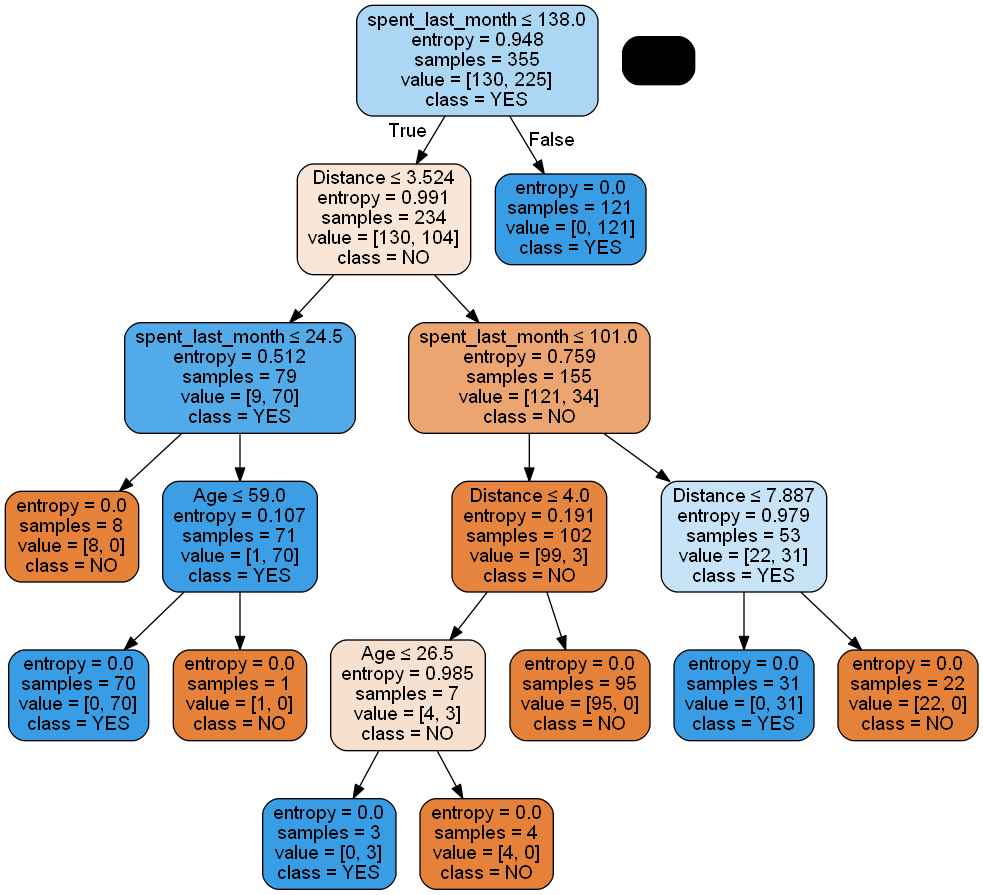

In [50]:
Image(graph.create_png())

**12. Interpret and evaluate the Entropy model - no maximum depth**

In [52]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_predict))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predict))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_predict, pos_label = 1.0))
print('Precision score for "No"' , metrics.precision_score(y_test,y_predict, pos_label = 0.0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_predict, pos_label = 1.0))
print('Recall score for "No"' , metrics.recall_score(y_test,y_predict, pos_label = 0.0))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


**13. Bulding another Entropy model with macimum depth 3**

In [60]:
Model_decision_tree_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

In [61]:
Model_decision_tree_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

In [67]:
y_predict = Model_decision_tree_2.predict(x_test)

In [68]:
y_predict = pd.Series(y_predict)

In [69]:
Model_decision_tree_2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

**13. Visualize the Model 2 -Decision Tree**

In [70]:
dot_data = StringIO()

In [75]:
dot_data = StringIO()
tree.export_graphviz(Model_decision_tree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=x_train.columns,class_names = ["NO", "YES"]) 

In [76]:
graph_2 = pydotplus.graph_from_dot_data(dot_data.getvalue())

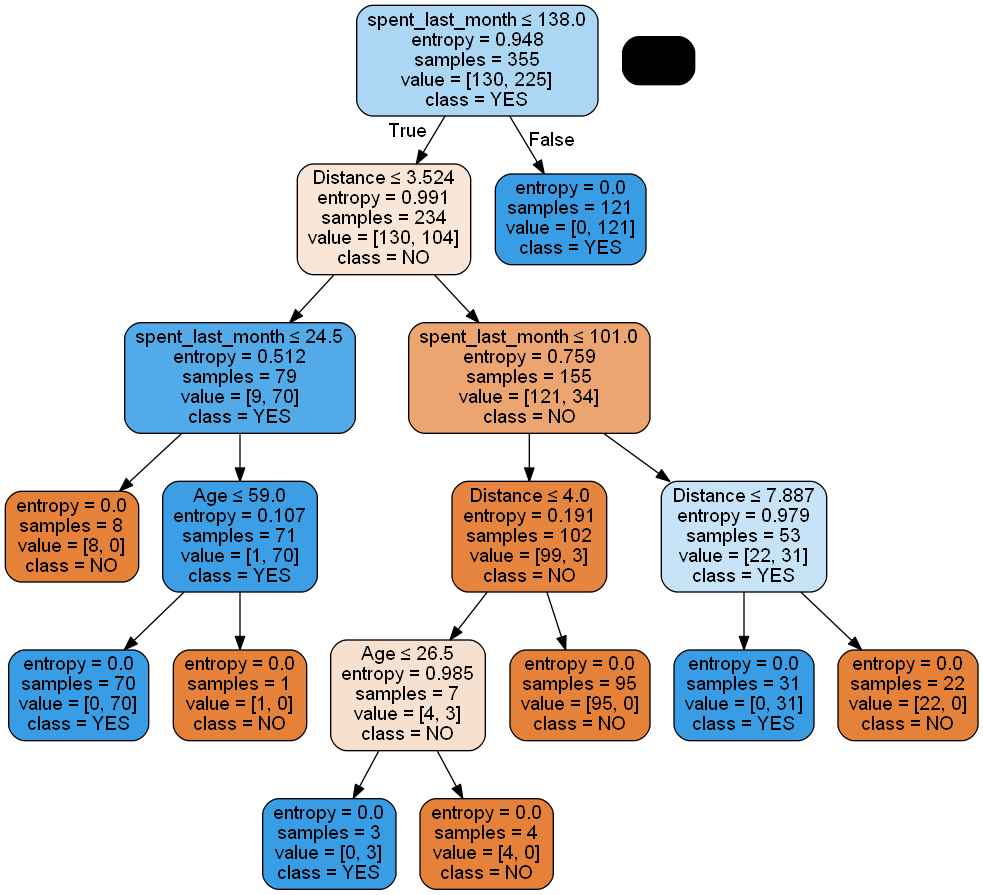

In [77]:
Image(graph.create_png())

In [78]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<spent_last_month &le; 138.0<br/>entropy = 0.948<br/>samples = 355<br/>value = [130, 225]<br/>class = YES>, fillcolor="#abd6f4"] ;\n1 [label=<Distance &le; 3.524<br/>entropy = 0.991<br/>samples = 234<br/>value = [130, 104]<br/>class = NO>, fillcolor="#fae6d7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<spent_last_month &le; 24.5<br/>entropy = 0.512<br/>samples = 79<br/>value = [9, 70]<br/>class = YES>, fillcolor="#52aae8"] ;\n1 -> 2 ;\n3 [label=<entropy = 0.0<br/>samples = 8<br/>value = [8, 0]<br/>class = NO>, fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label=<entropy = 0.107<br/>samples = 71<br/>value = [1, 70]<br/>class = YES>, fillcolor="#3c9ee5"] ;\n2 -> 4 ;\n5 [label=<spent_last_month &le; 101.0<br/>entropy = 0.759<br/>samples = 155<br/>value = [121, 34]<br/>class = NO>, fillcolor="#eca471"] ;\n1 -> 5 ;\n6 [label=<entr